<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/SVM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory란?</h1>

줄여서 'Colab'이라고도 하는 Colaboratory를 사용하면 브라우저에서 Python을 작성하고 실행할 수 있습니다. Colab은 다음과 같은 이점을 자랑합니다.
- 구성이 필요하지 않음
- GPU 무료 액세스
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

## <strong>시작하기</strong>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  4e-16  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  6e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  4e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  2e-15  7e-15
Optimal solution found.


AttributeError: ignored

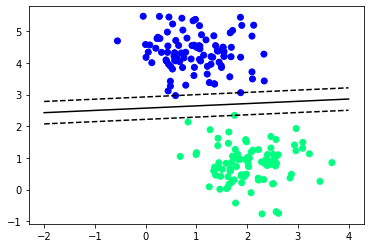

In [21]:
import numpy as np#배열 생성
import cvxopt#볼록 최적화 문제 해결
from sklearn.datasets.samples_generator import make_blobs#클러스링용 가상데이터를 생성
from sklearn.model_selection import train_test_split#테스트,학습 데이터 분리
from matplotlib import pyplot as plt#시각화 위함
from sklearn.metrics import confusion_matrix#혼돈 행렬


class SVM:
  def fit(self,X,y):
    n_samples,n_features=X.shape#데이터 개수, 속성 개수
    K=np.zeros((n_samples,n_samples))#H=X^T X
    for i in range(n_samples):
      for j in range(n_samples):
        K[i,j]=np.dot(X[i],X[j])#두 배열 내적곱
    H=cvxopt.matrix(np.outer(y,y)*K)
    f=cvxopt.matrix(np.ones(n_samples)*-1)#f=-1(2*N)
    B=cvxopt.matrix(y,(1,n_samples))#B=y^T
    b=cvxopt.matrix(0.0)#b=0
    A=cvxopt.matrix(np.diag(np.ones(n_samples)*-1))#-1(N*N)
    a=cvxopt.matrix(np.zeros(n_samples))#0 (1*N)
    solution=cvxopt.solvers.qp(H,f,A,a,B,b)#2차 계획법

    a=np.ravel(solution['x'])#1차원으로 변환
    sv=a>1e-5#라그랑주 승수

    ind=np.arange(len(a))[sv]
    self.a=a[sv]
    self.sv=X[sv]
    self.sv_y=y[sv]
    self.b=0 #절편
    for n in range(len(self.a)):# Intercept
      self.b+=self.sv_y[n]
      self.b-=np.sum(self.a*self.sv_y*K[ind[n],sv])
    self.b/=len(self.a)
    self.w=np.zeros(n_features)#가중치 
    for n in range(len(self.a)):# Weights
      self.w+=self.a[n]*self.sv_y[n]*self.sv[n]
X,y=make_blobs(n_samples=250,centers=2,random_state=0,cluster_std=0.60)#250개의 데이터 2개로 표줂편차 0.6으로 군집화
y[y==0]=-1#0을 -1로 변환
y=y.astype(float)#float으로 변환
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)#학습,테스트 데이터 분리

svm=SVM()#서포트벡터 머신
svm.fit(X_train,y_train)#x,y학습 데이터 예측 

def f(x,w,b,c=0): #결정 경계
  return (-w[0]*x-b+c)/w[1]

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')#샘플 데이터 표현
a0=-2;a1=f(a0,svm.w,svm.b)    # w.x + b = 0 경계선
b0=4;b1=f(b0,svm.w,svm.b)   
plt.plot([a0,b0],[a1,b1],'k')

a0=-2;a1=f(a0,svm.w,svm.b,1)    # w.x + b = 1 경계선
b0=4;b1=f(b0,svm.w,svm.b,1)   
plt.plot([a0,b0],[a1,b1],'k--')

a0=-2;a1=f(a0,svm.w,svm.b,-1)    # w.x + b = -1 경계선
b0=4;b1=f(b0,svm.w,svm.b,-1)   
plt.plot([a0,b0],[a1,b1],'k--')

y_pred=svm.predict(X_test)#테스트 데이터 예측
print('training\n',confusion_matrix(y_test,y_pred))#혼돈행렬 계산
y_pred=svm.predict(X_test)#테스트 데이터 예측
print('test\n',confusion_matrix(y_test,y_pred))#혼돈행렬 계산

plt.title('SVM')
plt.show()


In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

## 데이터 과학

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

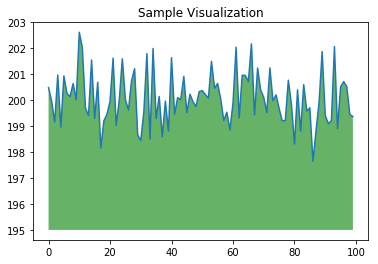

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

## 머신러닝

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

## 추가 리소스

### Colab에서 메모장 사용하기
- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab의 TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### 데이터로 작업하기
- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb) 
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

### 머신러닝 단기집중과정
다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas 소개](/notebooks/mlcc/intro_to_pandas.ipynb)
- [TensorFlow 개념](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [TensorFlow 첫걸음](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [신경망 소개](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [희소 데이터 및 임베딩 소개](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## 머신러닝 예시

Colaboratory 덕분에 가능해진 대화형 머신러닝 분석의 예시를 자세히 살펴보려면 <a href="https://tfhub.dev">TensorFlow Hub</a>의 모델을 사용한 이 튜토리얼을 살펴보세요.

일부 추천 예시는 다음과 같습니다.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
